# Task 2: Used Car Price Prediction using Ensemble Regression Models

*by 23AIML049, Hari Patel*

## Problem Statement

The used car market involves large variability in vehicle prices due to factors such as brand, model, age, mileage, fuel type, transmission, and condition. Accurately estimating the resale price of a used car is essential for buyers, sellers, and dealerships to make informed decisions.

The dataset contains information such as car brand, model, year, mileage, fuel type, engine capacity, transmission, and selling price.

## Target Variable
- Price (continuous numerical value)

## Models Used
- Random Forest Regressor  
- AdaBoost Regressor  
- XGBoost Regressor  
- CatBoost or LightGBM


In [68]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [69]:
# Load the dataset
df = pd.read_csv("car_price_prediction.csv")


# First few rows
df.head()

Car ID  Brand  Year  Engine Size  ... Mileage Condition     Price     Model
0       1  Tesla  2016          2.3  ...  114832       New  26613.92   Model X
1       2    BMW  2018          4.4  ...  143190      Used  14679.61  5 Series
2       3   Audi  2013          4.5  ...  181601       New  44402.61        A4
3       4  Tesla  2011          4.1  ...   68682       New  86374.33   Model Y
4       5   Ford  2009          2.6  ...  223009  Like New  73577.10   Mustang

[5 rows x 10 columns]

## Basic Data Analysis

In [70]:
# Last few rows
df.tail()

Car ID   Brand  Year  Engine Size  ... Mileage Condition     Price   Model
2495    2496    Audi  2020          2.4  ...   22650  Like New  61384.10      Q5
2496    2497    Audi  2001          5.7  ...   77701  Like New  24710.35      A3
2497    2498    Ford  2021          1.1  ...  272827  Like New  29902.45  Fiesta
2498    2499    Audi  2002          4.5  ...  229164  Like New  46085.67      Q5
2499    2500  Toyota  2005          4.6  ...   80978      Used  16594.14    RAV4

[5 rows x 10 columns]

In [71]:
# Shape of the dataset
df.shape

(2500, 10)

This is a decent sized dataset of 2500 rows and 10 columns

In [72]:
# Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [73]:
# Statistical Description of numerical features
df.describe()

Car ID       Year  Engine Size        Mileage         Price
count  2500.00000  2500.0000  2500.000000    2500.000000   2500.000000
mean   1250.50000  2011.6268     3.465240  149749.844800  52638.022532
std     721.83216     6.9917     1.432053   87919.952034  27295.833455
min       1.00000  2000.0000     1.000000      15.000000   5011.270000
25%     625.75000  2005.0000     2.200000   71831.500000  28908.485000
50%    1250.50000  2012.0000     3.400000  149085.000000  53485.240000
75%    1875.25000  2018.0000     4.700000  225990.500000  75838.532500
max    2500.00000  2023.0000     6.000000  299967.000000  99982.590000

In [74]:
# Categorical
df.describe(include='object')

Brand Fuel Type Transmission Condition   Model
count     2500      2500         2500      2500    2500
unique       7         4            2         3      28
top     Toyota    Diesel       Manual      Used  Fiesta
freq       374       655         1308       855     103

In [75]:
# Checking for null values
df.isnull().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

The dataset is clean in terms of null values

In [76]:
# Duplicated values
df.duplicated().sum()

np.int64(0)

We have zero duplicated rows

## EDA

### Univariate Analysis

In [77]:
# Splitting
numerical_cols = df.select_dtypes(include=np.number).columns.to_list()
categorical_cols = df.select_dtypes(include='object').columns.to_list()

print("Numerical Columns:")
print(numerical_cols)
print("\nCategorical Columns:")
print(categorical_cols)

Numerical Columns:
['Car ID', 'Year', 'Engine Size', 'Mileage', 'Price']

Categorical Columns:
['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model']


#### Numerical

In [78]:
# Plot config
num_cols = 2
num_rows = int(np.ceil(len(numerical_cols) / num_cols))

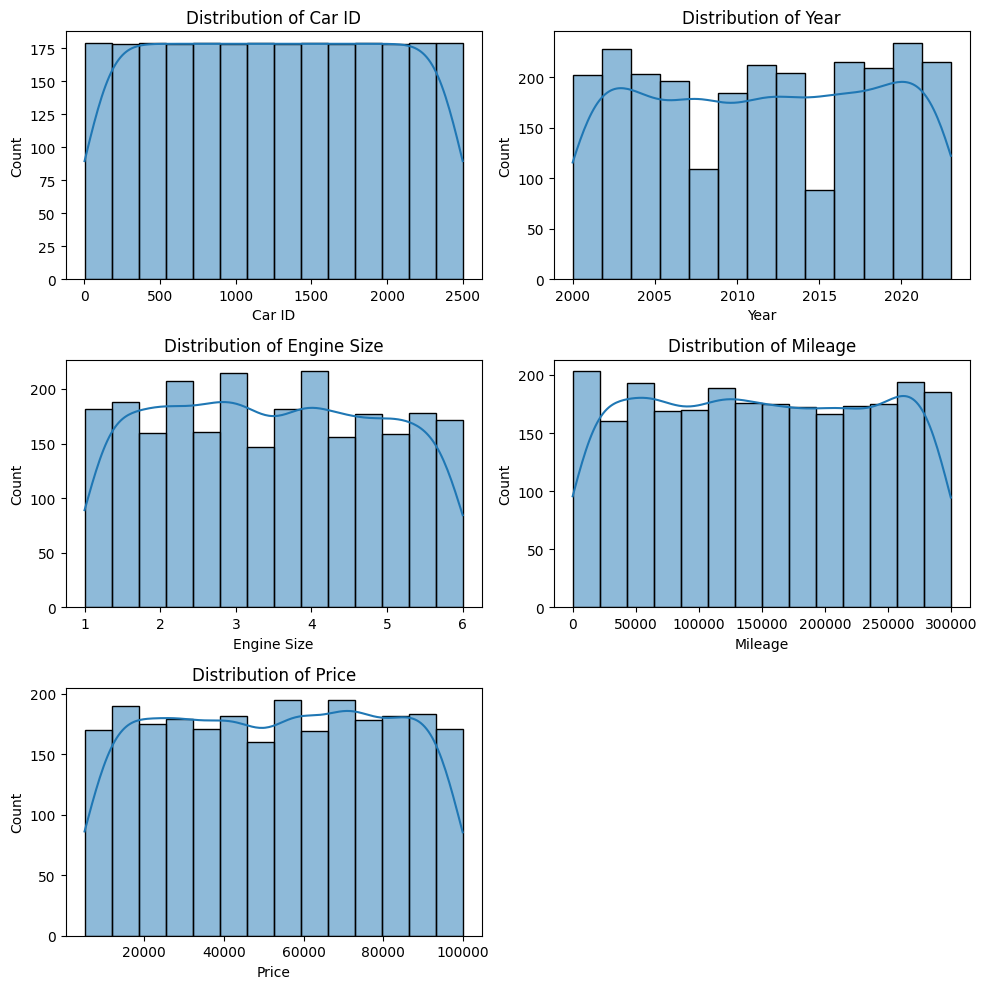

In [79]:
# Distribution
plt.figure(figsize = (10, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [80]:
# Checking skewness
for col in numerical_cols:
  if df[col].skew() > 0.5 or df[col].skew() < -0.5:
    print(f'{col} is highly skewed')
  else:
    print(f'{col} is not skewed')

Car ID is not skewed
Year is not skewed
Engine Size is not skewed
Mileage is not skewed
Price is not skewed


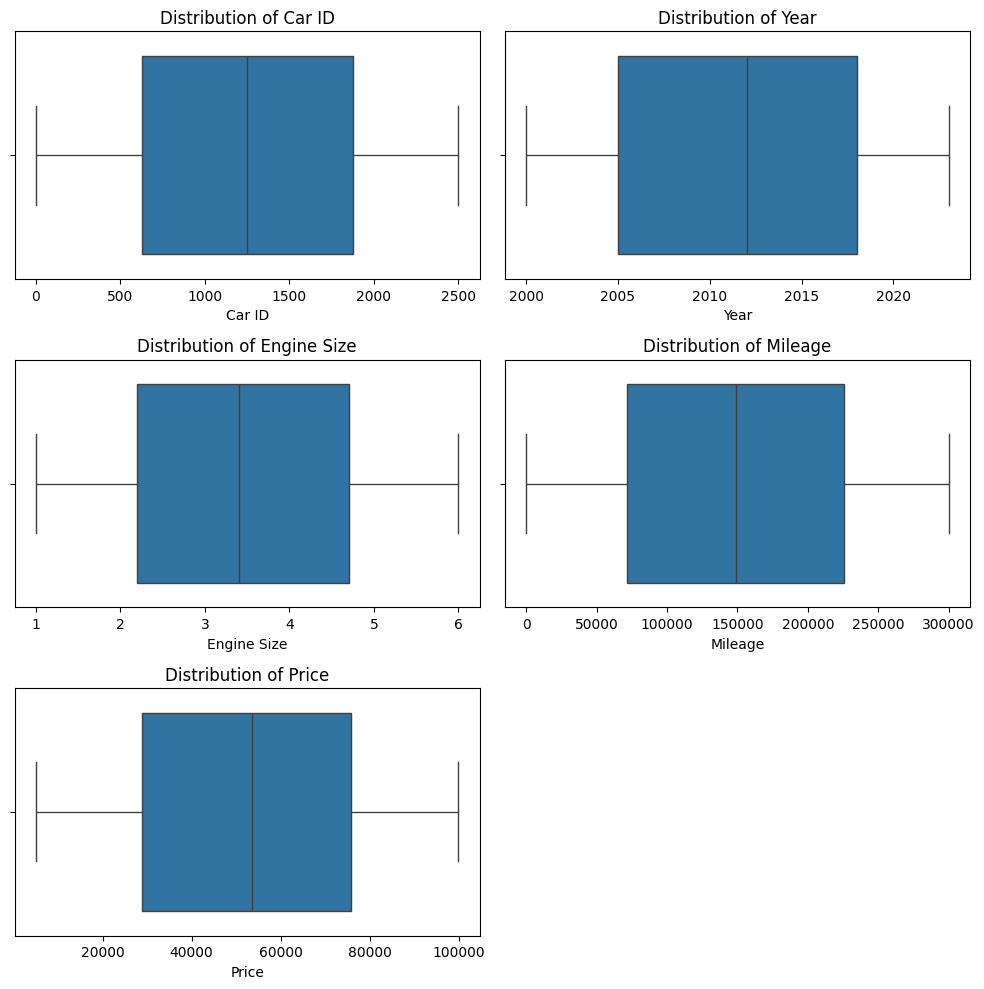

In [81]:
# Box plot
plt.figure(figsize = (10, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x = df[col])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

No outliers detected

#### Categorical Cols

In [82]:
# Plot config
num_cols = 2
num_rows = int(np.ceil(len(categorical_cols) / num_cols))

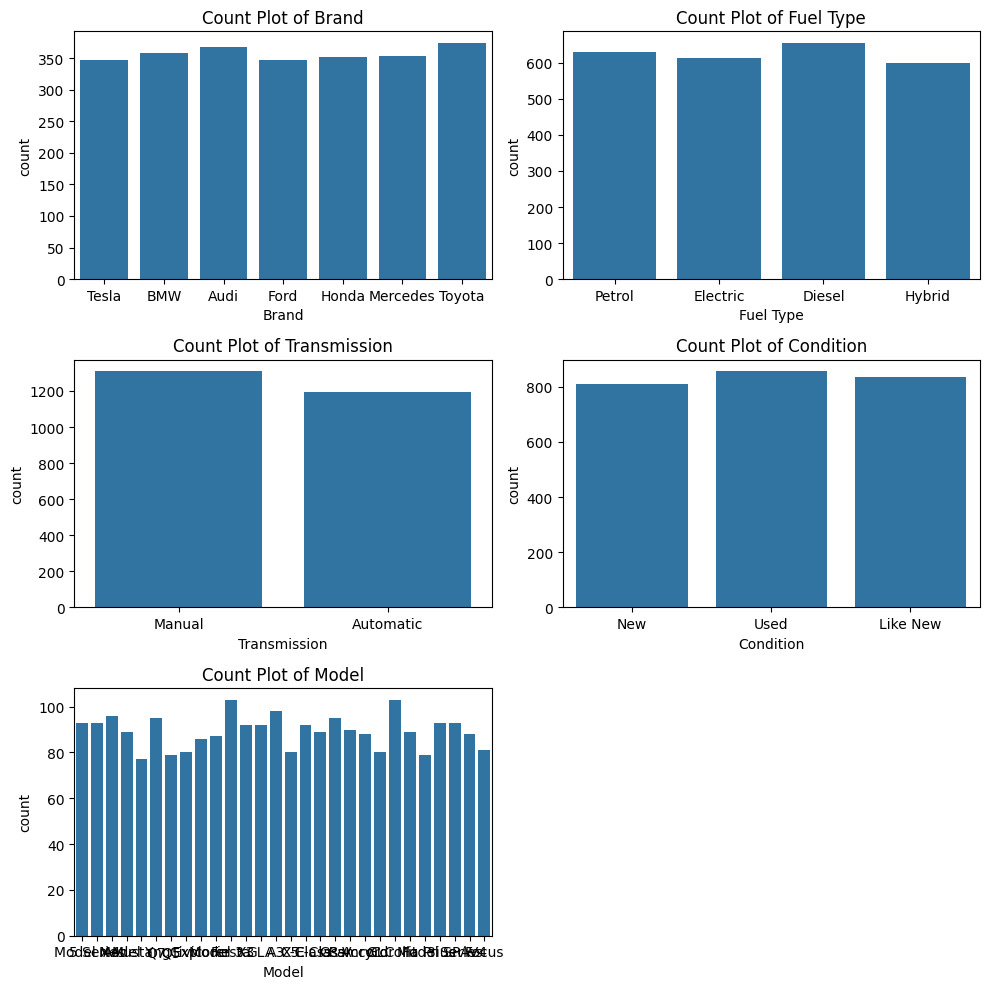

In [83]:
# Count plot
plt.figure(figsize = (10, 10))
for i, col in enumerate(categorical_cols):
  plt.subplot(num_rows, num_cols, i + 1)
  sns.countplot(x = df[col])
  plt.title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()


The distribution is nearly uniform

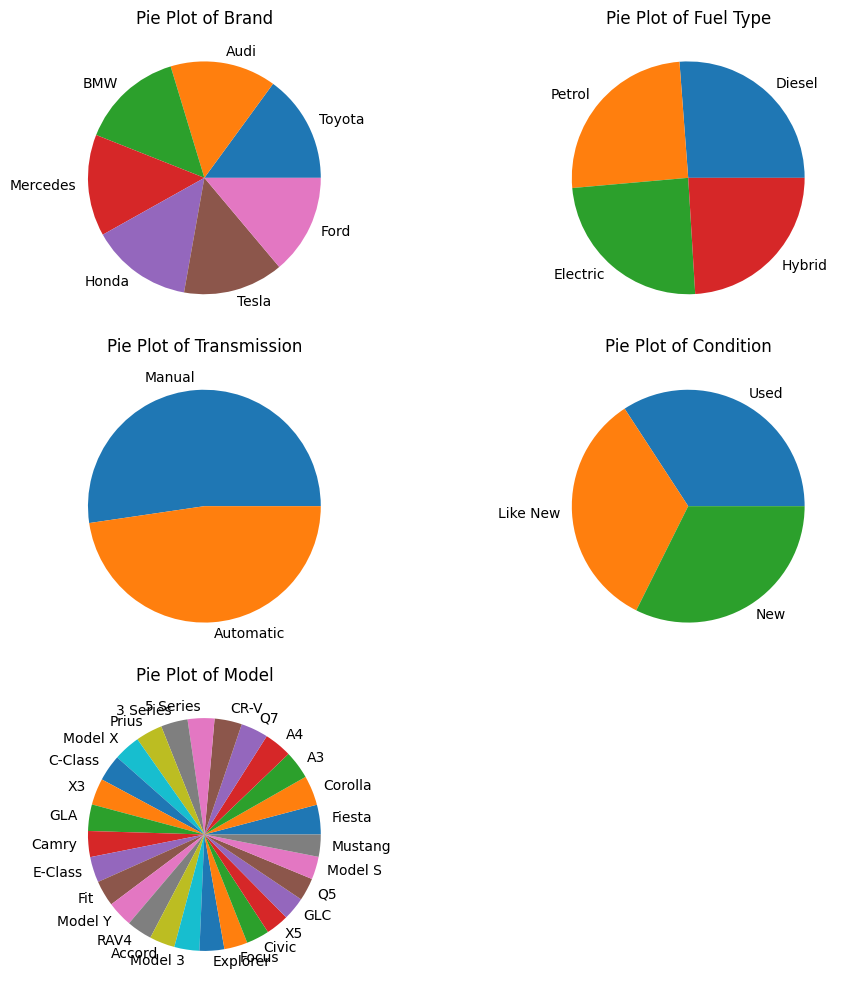

In [84]:
# Pie plot
plt.figure(figsize = (10, 10))
for i, col in enumerate(categorical_cols):
  plt.subplot(num_rows, num_cols, i + 1)
  plt.pie(df[col].value_counts(), labels = df[col].value_counts().index)
  plt.title(f'Pie Plot of {col}')

plt.tight_layout()
plt.show()

### Bivariate Analysis

#### Numerical-Numerical

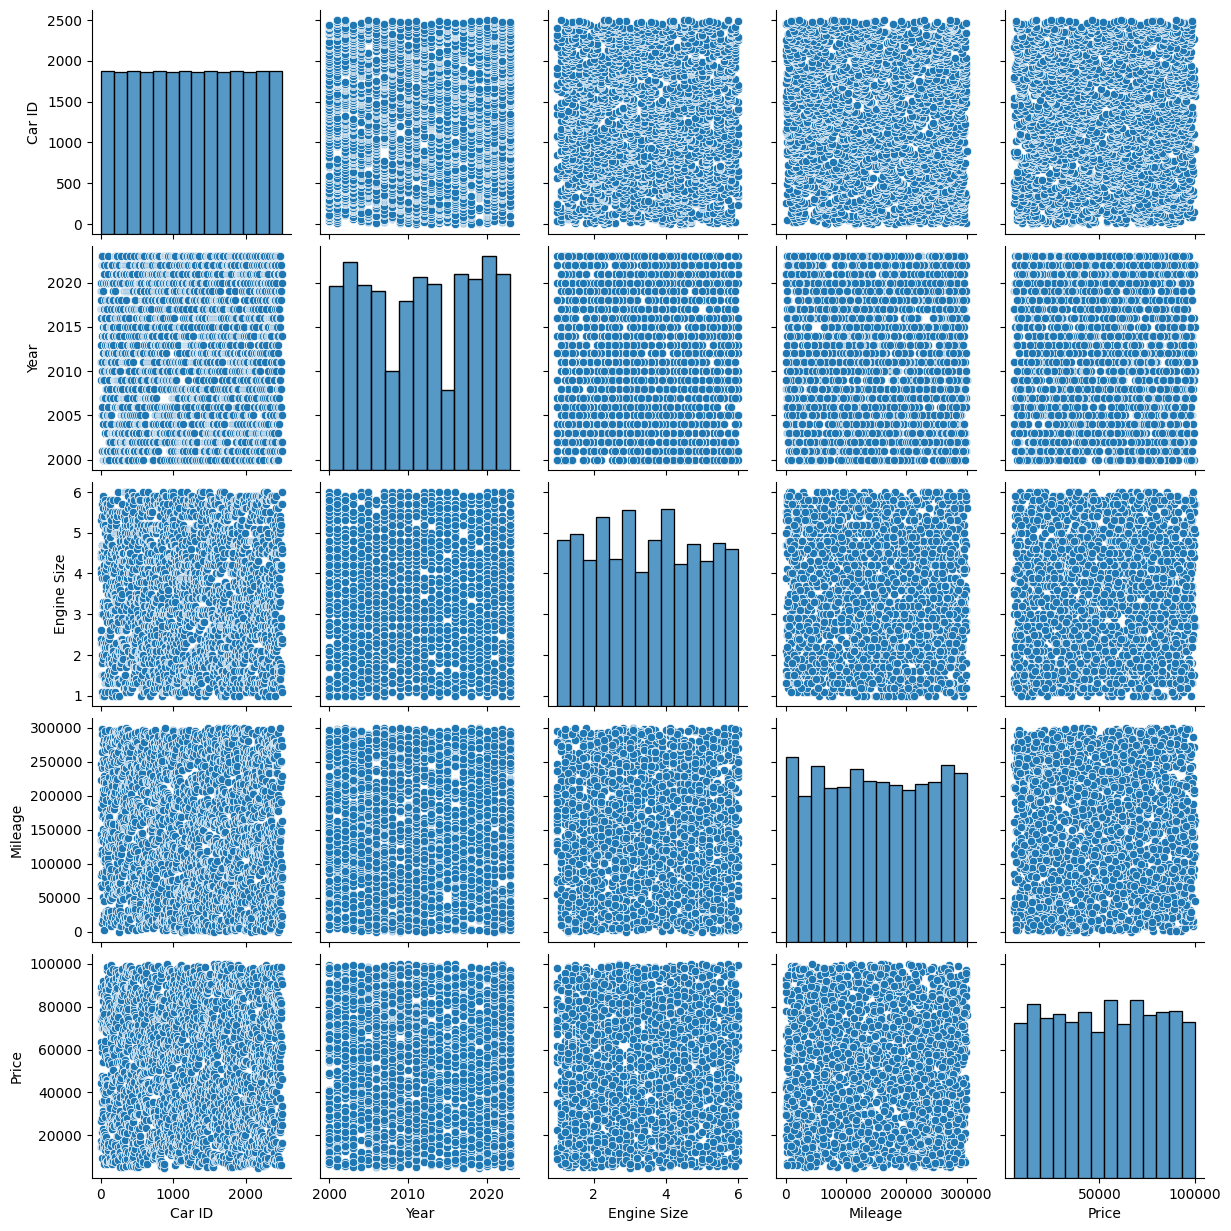

In [85]:
# Pairplot
sns.pairplot(df)

#### Categorical-Categorical

In [99]:
# Encoding the features
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()
le = LabelEncoder()

for col in categorical_cols:
  df_copy[col] = le.fit_transform(df_copy[col])


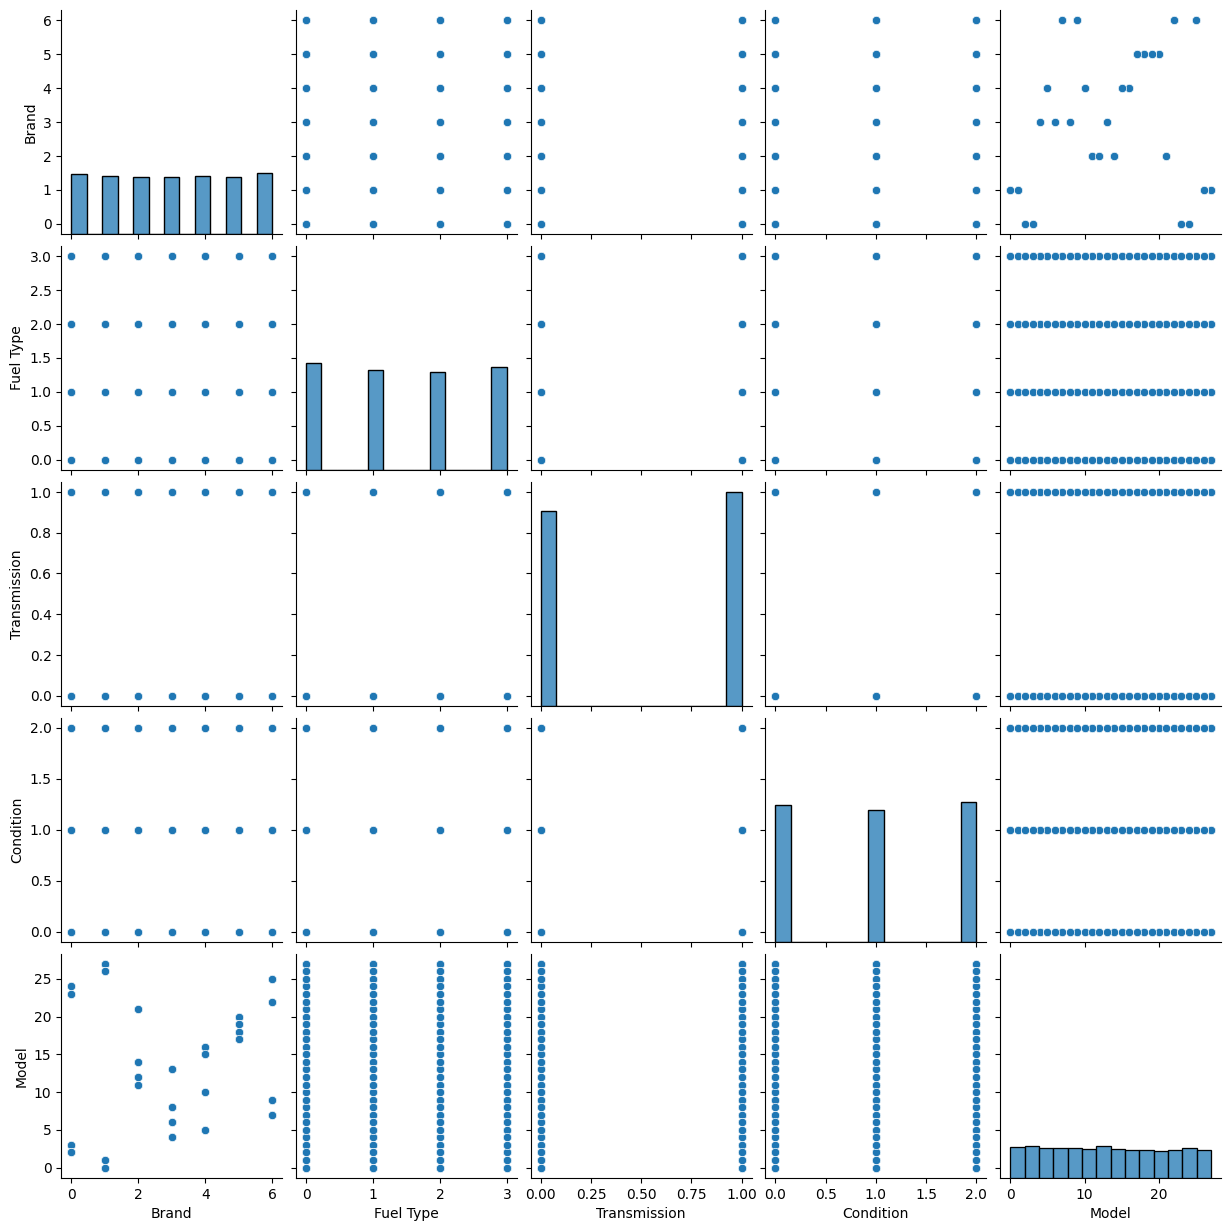

In [87]:
sns.pairplot(df_copy[categorical_cols])
plt.show()

#### Numerical-Categorical

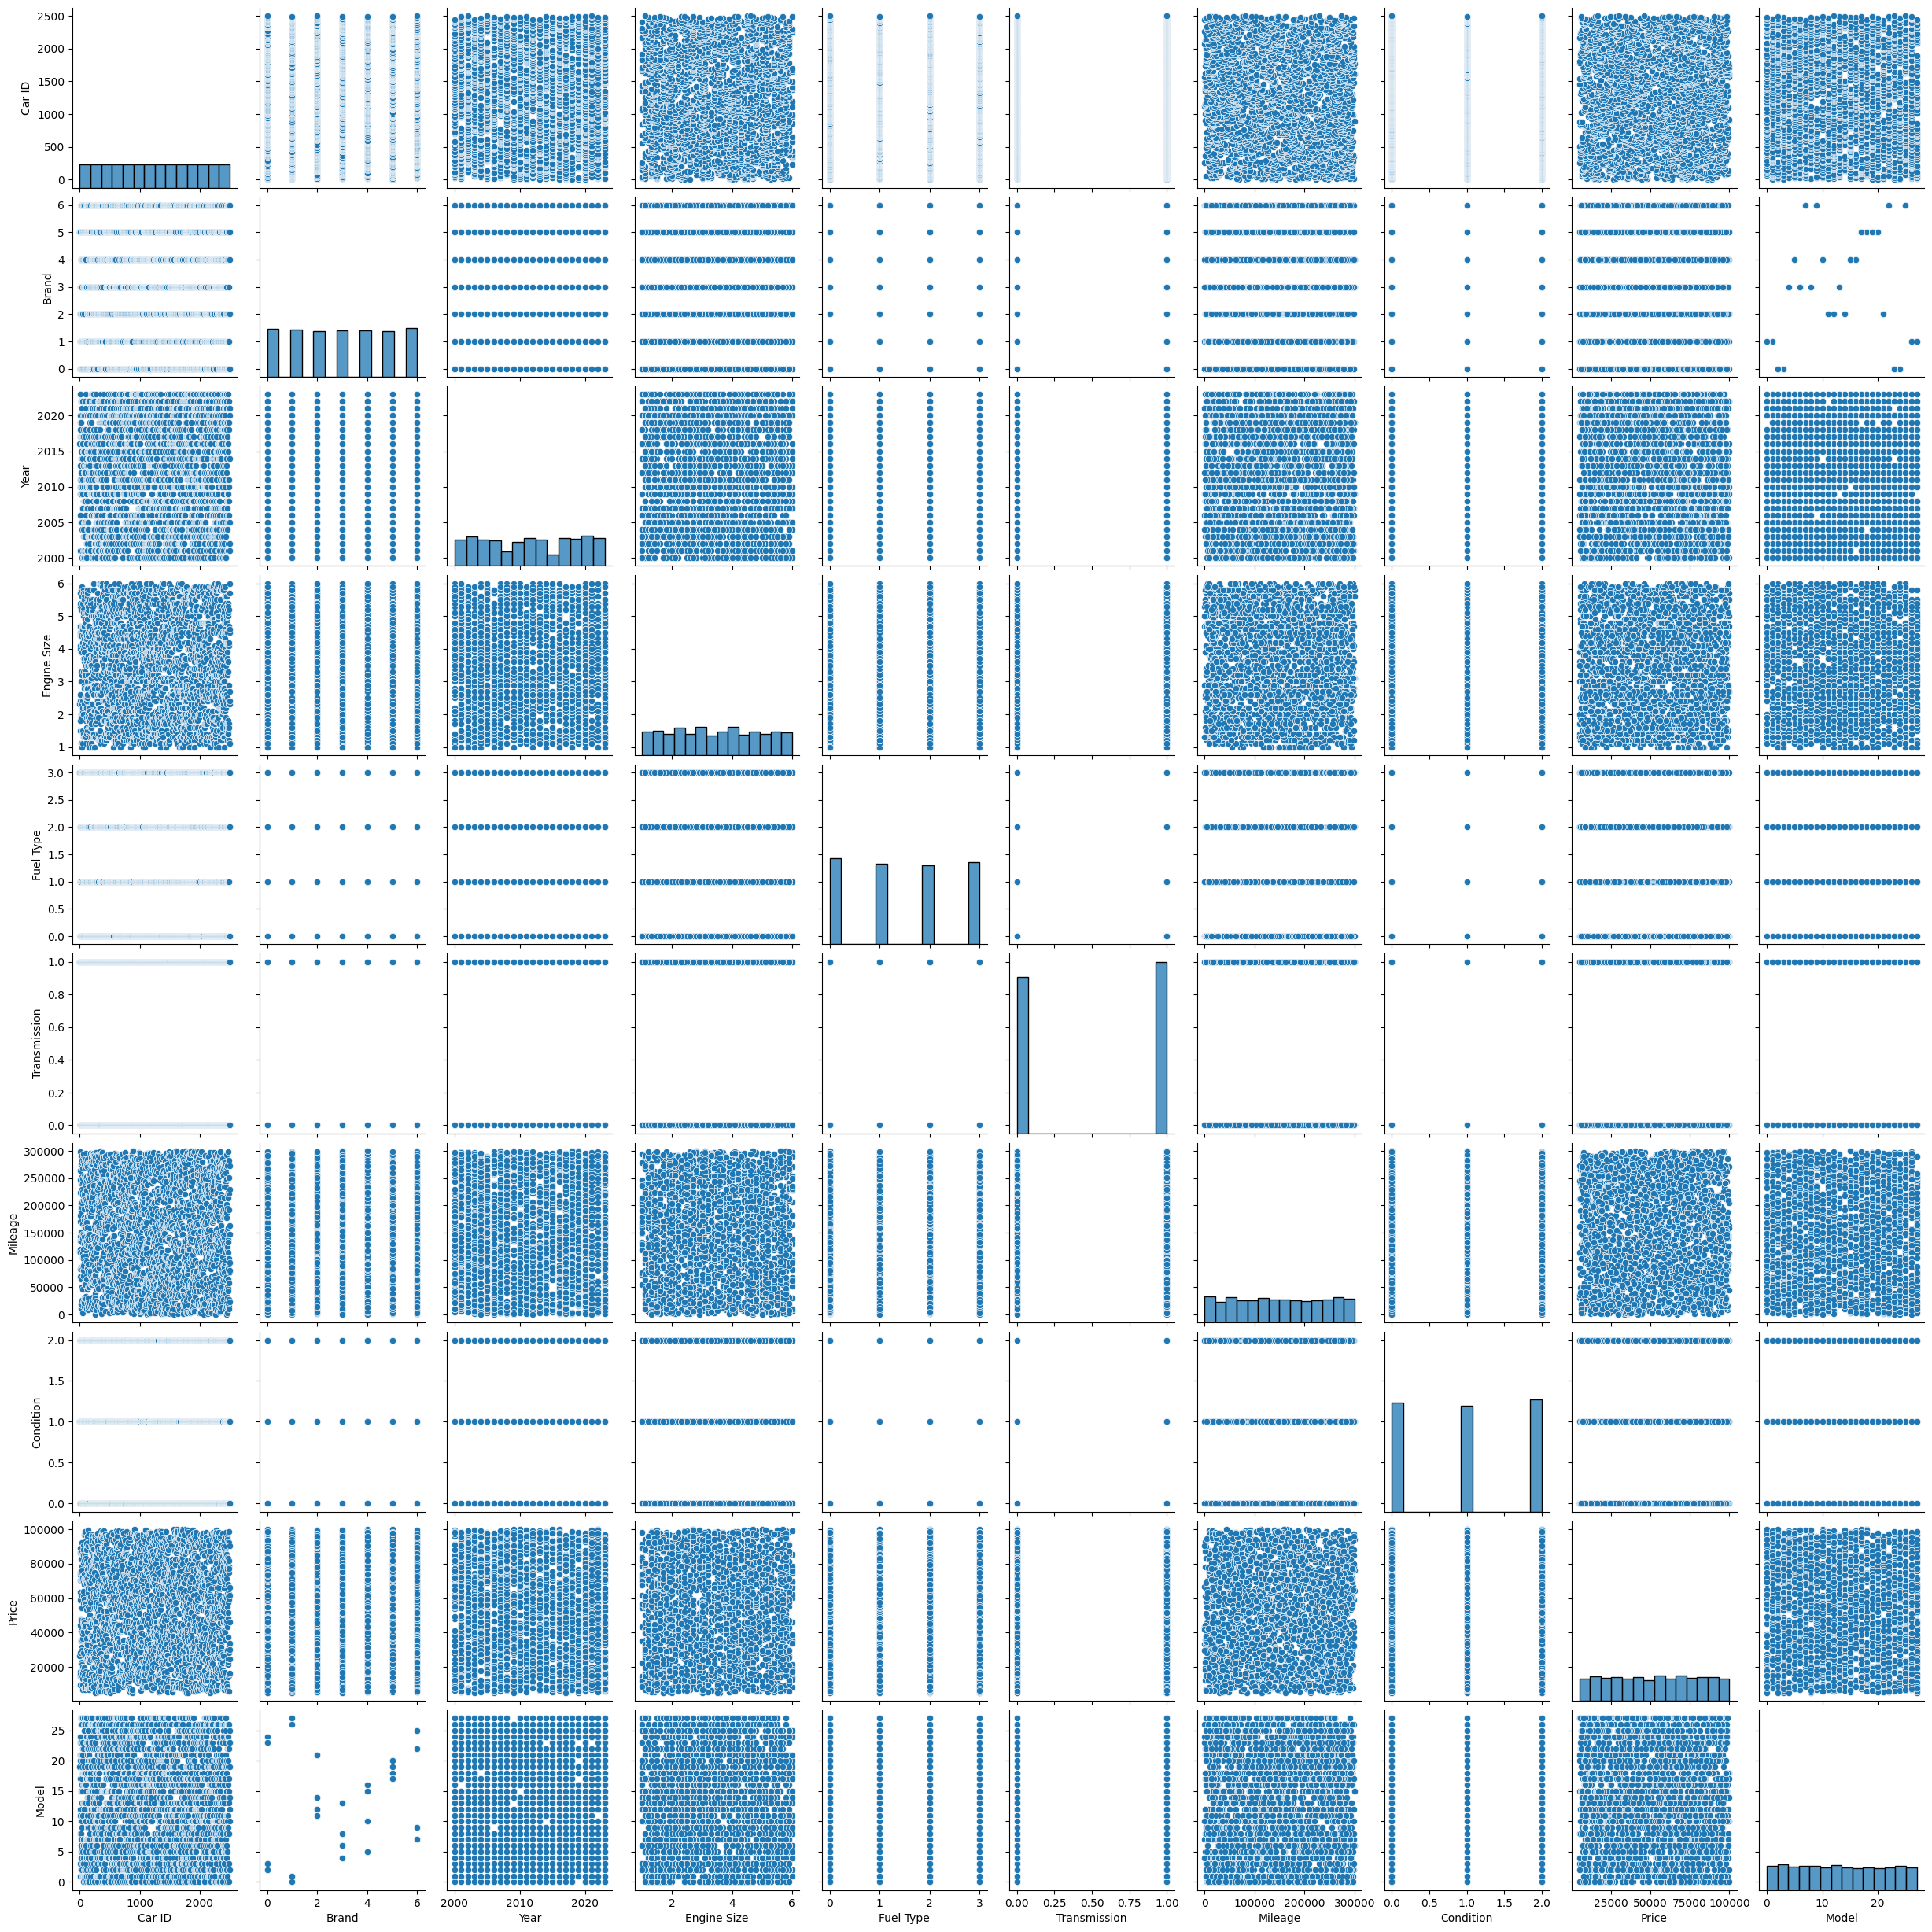

In [88]:
sns.pairplot(df_copy)
plt.show()

### Multivariate Analysis

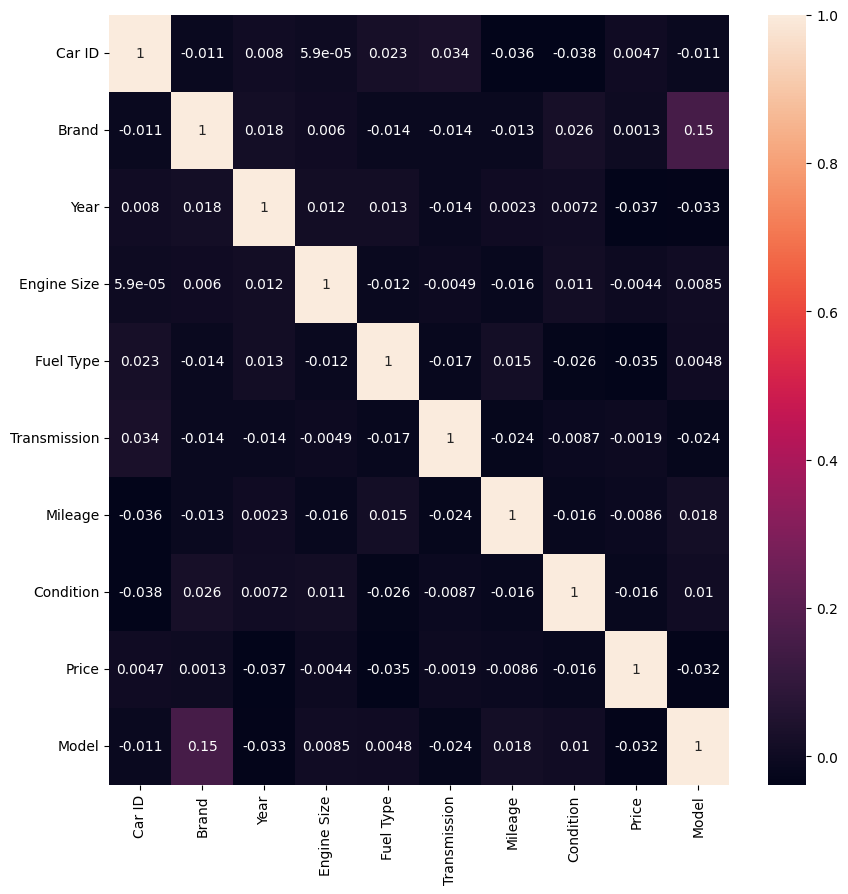

In [89]:
corr = df_copy.corr()

plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True)
plt.show()

### Analysis with Target variable

In [100]:
# Correlation
target_corr = df_copy.corr()['Price'].sort_values(ascending = False)
target_corr

Price           1.000000
Car ID          0.004650
Brand           0.001315
Transmission   -0.001877
Engine Size    -0.004420
Mileage        -0.008567
Condition      -0.015669
Model          -0.032302
Fuel Type      -0.034958
Year           -0.036805
Name: Price, dtype: float64

- All features have correlation values very close to 0 with Price.

- This indicates almost no linear relationship between the features and the target.

## Preprocessing

In [90]:
# Split into X and y
X = df.drop('Price', axis = 1)
y = df['Price']

In [91]:
# Dropping car id
X.drop('Car ID', axis = 1, inplace = True)

In [92]:
# Define lists again
numerical_cols = X.select_dtypes(include=np.number).columns.to_list()
categorical_cols = X.select_dtypes(include='object').columns.to_list()

In [93]:
# Split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Numerical pipeline
# Using 'passthrough' as no tranformation is needed for numerical

# Categorical pipeline
cat_pipe = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown = 'ignore'))
])

# Column transformer
preprocessor = ColumnTransformer([
    ('num', 'passthrough', numerical_cols),
    ('cat', cat_pipe, categorical_cols)
])

## Modeling

- Random Forest Regressor
- AdaBoost Regressor
- XGBoost Regressor
- CatBoost or LightGBM

In [95]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models = {
    "Random Forest Regressor": RandomForestRegressor(random_state = 42),
    "AdaBoost Regressor": AdaBoostRegressor(random_state = 42),
    "XGBoost Regressor": XGBRegressor(random_state = 42),
    "LightGBM": LGBMRegressor(random_state = 42)
}


In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


for name, model in models.items():
  model = Pipeline([
      ('preprocessor', preprocessor),
      ('model', model)
  ])

  # Fit model
  model.fit(X_train, y_train)

  # Predict
  y_pred = model.predict(X_test)

  # Evaluate
  print("Model: ", name)
  print("MSE: ", mean_squared_error(y_test, y_pred))
  print("MAE: ", mean_absolute_error(y_test, y_pred))
  print("R2 Score: ", r2_score(y_test, y_pred))
  print("-" * 50)

Model:  Random Forest Regressor
MSE:  809514980.2524645
MAE:  24487.7537476
R2 Score:  -0.06859140571910749
--------------------------------------------------
Model:  AdaBoost Regressor
MSE:  755313975.2373548
MAE:  23709.81043091195
R2 Score:  0.00295603880430495
--------------------------------------------------
Model:  XGBoost Regressor
MSE:  968865303.5852286
MAE:  26233.18501203125
R2 Score:  -0.2789400591298783
--------------------------------------------------
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 2000, number of used features: 47
[LightGBM] [Info] Start training from score 52461.688673
Model:  LightGBM
MSE:  873901145.814084
MAE:  25188.314416197594
R2 Score:  -0.15358366014891045
--------------------------------------------------


**Insights**

- Most models produced **negative R² scores**, indicating weak predictive performance.
- **AdaBoost Regressor** achieved:
  - Lowest MSE and MAE
  - The only **positive R² score**
- This shows AdaBoost slightly outperforms the mean baseline even without tuning.

## Hyperparameter Tuning

We will only tune AdaBoost as it performed the best in base conditions

In [97]:
from sklearn.model_selection import GridSearchCV

# Defining the model again
ada = AdaBoostRegressor(random_state=42)

# Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', ada)
])

# Params grid
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'model__loss': ['linear', 'square', 'exponential']
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fitting
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 45 candidates, totalling 225 fits


In [98]:
# Predictions
y_pred = best_model.predict(X_test)

# Evaluation
print("Best Parameters:", grid_search.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Best Parameters: {'model__learning_rate': 0.5, 'model__loss': 'square', 'model__n_estimators': 200}
MSE: 757257080.2775578
MAE: 23761.61268171462
R2 Score: 0.00039106422443613287


## Conclusion

- The dataset contained ~2,500 records with numerical and categorical vehicle-related features. Correlation analysis showed **very weak linear relationships** between predictors and the target (Price).  
- Preprocessing included duplicate removal, outlier handling, log transformations, one-hot encoding, and scaling, with an 80:20 train-test split.  
- Ensemble models applied: Random Forest, AdaBoost, XGBoost, and LightGBM regressors.  
- Baseline results: Most models had **negative R² scores**; AdaBoost performed slightly better, occasionally achieving a positive R².  
- Hyperparameter tuning of AdaBoost led to **minor improvements** in MSE and MAE, but R² remained near zero.  
- Overall, the weak predictive signal in the dataset limited model performance. **Feature engineering and additional relevant variables** are crucial to improve regression accuracy.
